# Solving Maximum Likelihood Estimation Problems
## Mehmet Gönen
## January 2, 2023

In [1]:
# load libraries
import matplotlib.pyplot as plt

import numpy as np
import scipy.optimize as opt
import scipy.stats as sta

## Maximum likelihood estimation for Bernoulli distribution

\begin{align*}
    \mbox{likelihood} = \Pr(X_{1} = x_{1}, X_{2} = x_{2}, \dots, X_{N} = x_{N}) &= \Pr(X_{1} = x_{1}) \Pr(X_{2} = x_{2}) \dots \Pr(X_{N} = x_{N}) \\
    &= \prod\limits_{i = 1}^{N} \Pr(X_{i} = x_{i}) \\
    &= \prod\limits_{i = 1}^{N} \left[p^{x_{i}} (1 - p)^{(1 - x_{i})}\right]\\
    \mbox{log-likelihood} &= \log \left(\prod\limits_{i = 1}^{N} \left[p^{x_{i}} (1 - p)^{(1 - x_{i})}\right]\right) \\
    &= \sum\limits_{i = 1}^{N} \left[x_{i}\log(p) + (1 - x_{i}) \log(1 - p)\right]
\end{align*}

In [2]:
np.random.seed(220)
N = 200
p_truth = 0.8

x = 1 * (np.random.rand(N) < p_truth)
print(x)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0
 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0]


In [3]:
def likelihood_Bernoulli(p):
    return np.prod(p**x * (1 - p)**(1 - x))

def log_likelihood_Bernoulli(p):
    return np.sum(x * np.log(p) + (1 - x) * np.log(1 - p))

def negative_log_likelihood_Bernoulli(p):
    return -log_likelihood_Bernoulli(p)

In [4]:
p = np.arange(start = 0.01, stop = 1.00, step = 0.01)
print(p)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99]


In [5]:
likelihood = [likelihood_Bernoulli(p_current) for p_current in p]
print(likelihood)

log_likelihood = [log_likelihood_Bernoulli(p_current) for p_current in p]
print(log_likelihood)

[6.491026283e-315, 7.663560212931983e-268, 2.183843761374171e-240, 5.768749213930481e-221, 6.031227467454936e-206, 1.0333418416535383e-193, 2.1142632942049253e-183, 1.6904585782246091e-174, 1.1346289275562184e-166, 1.0775263664305695e-159, 2.100979696946025e-153, 1.1071603694862873e-147, 1.9428271987203783e-142, 1.3351652020664226e-137, 4.08640566319992e-133, 6.177981132573558e-129, 5.021559680208382e-125, 2.3538509209195566e-121, 6.747939207821344e-118, 1.2433080910244814e-114, 1.5360105502898046e-111, 1.3195589746358443e-108, 8.135259996025228e-106, 3.699554391649977e-103, 1.2712052779250407e-100, 3.3711616659062986e-98, 7.030625388833303e-96, 1.1724876239609247e-93, 1.5870648206702064e-91, 1.7670657594130585e-89, 1.637935643069768e-87, 1.2777027884429067e-85, 8.470422572628433e-84, 4.814810555226405e-82, 2.3656870833594155e-80, 1.0121188229879097e-78, 3.7958959992039605e-77, 1.255646288460562e-75, 3.68405587695929e-74, 9.636568325228471e-73, 2.2578859733232253e-71, 4.759291610999653

0.785


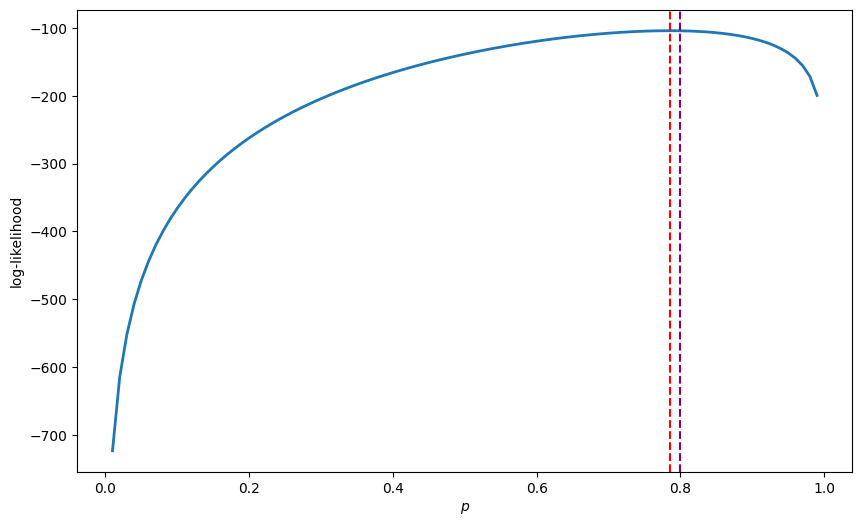

In [6]:
p_estimate = np.mean(x)
print(p_estimate)

plt.figure(figsize = (10, 6))
plt.plot(p, log_likelihood, linewidth = 2)
plt.axvline(x = p_estimate, color = "red", linestyle = "dashed")
plt.axvline(x = p_truth, color = "purple", linestyle = "dashed")
plt.xlabel("$p$")
plt.ylabel("log-likelihood")
plt.show()

In [7]:
res = opt.minimize_scalar(negative_log_likelihood_Bernoulli,
                          bounds = (0, 1), method = "bounded",
                          options = {"disp": True})
print(res.x)


Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )
0.7850001232913533


In [8]:
res = opt.minimize(fun = negative_log_likelihood_Bernoulli, x0 = 0.5,
                   method = "Powell", bounds = [(0, 1)],
                   options = {"disp": True})
print(res.x)

Optimization terminated successfully.
         Current function value: 104.101277
         Iterations: 2
         Function evaluations: 20
[0.78498564]


/var/folders/qp/w763nb2s1h3fhnmyw1n9f3100000gn/T/ipykernel_4273/2403527415.py:5: RuntimeWarning: invalid value encountered in log
  return np.sum(x * np.log(p) + (1 - x) * np.log(1 - p))


## Maximum likelihood estimation for Poisson distribution

\begin{align*}
    \mbox{likelihood} = \Pr(X_{1} = x_{1}, X_{2} = x_{2}, \dots, X_{N} = x_{N}) &= \Pr(X_{1} = x_{1}) \Pr(X_{2} = x_{2}) \dots \Pr(X_{N} = x_{N}) \\
    &= \prod\limits_{i = 1}^{N} \Pr(X_{i} = x_{i}) \\
    &= \prod\limits_{i = 1}^{N} \left[ \dfrac{e^{-\lambda}\lambda^{x_{i}}}{x_{i}!} \right]\\
    \mbox{log-likelihood} &= \log \left(\prod\limits_{i = 1}^{N} \left[ \dfrac{e^{-\lambda}\lambda^{x_{i}}}{x_{i}!} \right]\right) \\
    &= \sum\limits_{i = 1}^{N} \left[-\lambda + x_{i} \log(\lambda) -\log(x_{i}!) \right] \\
    \mbox{negative log-likelihood} &=^{+} \sum\limits_{i = 1}^{N} \left[\lambda - x_{i} \log(\lambda) \right] \\
    &=^{+} N \lambda - \log(\lambda) \sum\limits_{i = 1}^{N} x_{i} \\
    \dfrac{\partial \mbox{negative log-likelihood}}{\partial \lambda} &=^{+} N - \dfrac{1}{\lambda} \sum\limits_{i = 1}^{N} x_{i} \\
    \dfrac{\partial^{2} \mbox{negative log-likelihood}}{\partial \lambda^{2}} &=^{+} \dfrac{1}{\lambda^{2}} \sum\limits_{i = 1}^{N} x_{i}    
\end{align*}

In [9]:
np.random.seed(220)
N = 200
lam_truth = 5

x = np.random.poisson(lam = 5, size = N)
print(x)

[ 4  9  5  5  4  8  6  6  6  7  7  7  6  4  4  5  4  5  5  8  7 10  4  4
  4  1  6  6  6  4  4 10  5  2  4  8  6  3  3  6  8  5  6  3  4  4  4  6
  6  9  5  4  5  4  2  7  9  2  0 13  9  5  3  0  5  8  6  9  5  9  8  5
  6  5  3  3  7  4 10  8  4  7  3  9  3  5  2  5  5  2  2  5  8  3  6  5
  2 10  7  5  5  5  3  5  6  6  4  6  5  3  3  5  4  3  5  9  5  8  5  6
 10  2  8  3  6  5  9  7  2  5  5  7  7  3  1  8  5  6 11  3  3 10  4  2
  6  5  4  3  6  4  3  6  4  8  5  6  1  8  8  6  8  5  6  3 11  4  3  8
  8 11  5  6  4  3  4  1  6  5  7  4  5  4  2  3  7  6  5  2  5  4  3  6
  3  9 11  4  7  1  3  5]


In [10]:
def negative_log_likelihood_Poisson(lam):
    return N * lam - np.log(lam) * np.sum(x)

def negative_log_likelihood_Poisson_derivative(lam):
    return N - np.sum(x) / lam

5.315


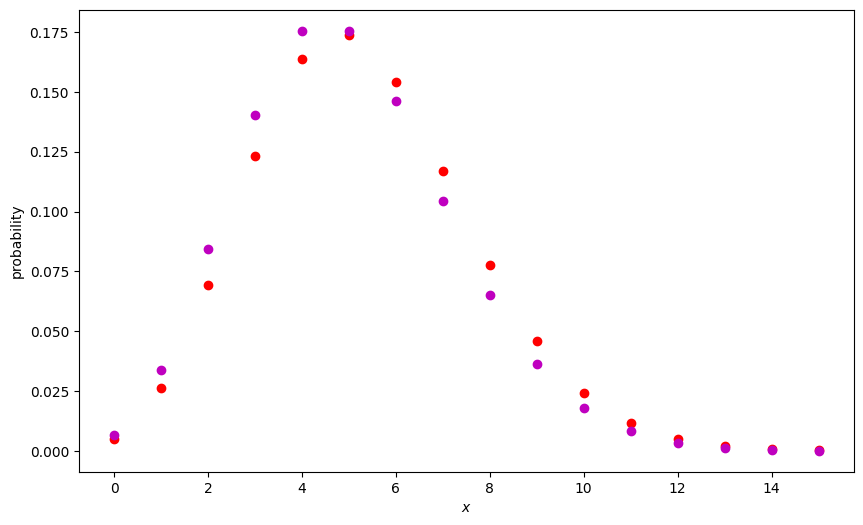

In [11]:
lam_estimate = np.mean(x)
print(lam_estimate)

x_range = np.arange(0, 16)
pdf_estimate = sta.poisson.pmf(x_range, mu = lam_estimate)
pdf_truth = sta.poisson.pmf(x_range, mu = lam_truth)

plt.figure(figsize = (10, 6))
plt.plot(x_range, pdf_estimate, "ro")
plt.plot(x_range, pdf_truth, "mo")
plt.xlabel("$x$")
plt.ylabel("probability")
plt.show()

In [12]:
res = opt.minimize(fun = negative_log_likelihood_Poisson, x0 = 10,
                   method = "Powell",
                   options = {"disp": True})
print(res.x)

Optimization terminated successfully.
         Current function value: -712.776592
         Iterations: 2
         Function evaluations: 24
[5.31500612]


In [13]:
res = opt.minimize(fun = negative_log_likelihood_Poisson, x0 = 10, 
                   method = "BFGS",
                   jac = negative_log_likelihood_Poisson_derivative, 
                   options = {"disp": True})
print(res.x)

Optimization terminated successfully.
         Current function value: -712.776592
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
[5.31499995]
